In [1]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
import seaborn as sns; sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import math

In [3]:
s = gpd.read_file('data/streets.json')
s = s.drop(columns={'avg_image_date','avg_label_date'})

In [5]:
s

,street_edge_id,osm_id,score,audit_count,significance,feature,geometry,start_coord,end_coord
0,22344,4636201,9.994472e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 10.0, 'NoCurbRamp': 0.0, 'Obstacl...","LINESTRING (-122.33642 47.66137, -122.33642 47...","(-122.3364175, 47.6613705)","(-122.3364154, 47.6617598)"
1,11233,4636259,9.988305e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 9.0, 'NoCurbRamp': 0.0, 'Obstacle...","LINESTRING (-122.37548 47.63359, -122.37618 47...","(-122.3754794, 47.6335929)","(-122.3761805300501, 47.63359893600859)"
2,26264,4708342,9.770226e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 9.0, 'NoCurbRamp': 2.0, 'Obstacle...","LINESTRING (-122.27730 47.55043, -122.27728 47...","(-122.2772957, 47.5504306)","(-122.2771447, 47.5497296)"
3,24416,4708348,9.933071e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 8.0, 'NoCurbRamp': 1.0, 'Obstacle...","LINESTRING (-122.35236 47.61447, -122.35228 47...","(-122.3523592, 47.614468)","(-122.3516501, 47.6140568)"
4,4790,4714349,9.996646e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 16.0, 'NoCurbRamp': 0.0, 'Obstacl...","LINESTRING (-122.36363 47.63776, -122.36429 47...","(-122.363626, 47.6377636)","(-122.3649861, 47.6377638)"
...,...,...,...,...,...,...,...,...,...
19503,7004,663670890,5.602796e-09,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 0.0, 'NoCurbRamp': 4.0, 'Obstacle...","LINESTRING (-122.30406 47.55333, -122.30408 47...","(-122.3040554, 47.5533326)","(-122.3040807, 47.5510816)"
19504,19812,663670891,9.947799e-01,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 7.0, 'NoCurbRamp': 0.0, 'Obstacle...","LINESTRING (-122.28309 47.68305, -122.28204 47...","(-122.283094, 47.6830486)","(-122.2820356, 47.6830468)"
19505,9180,663670891,2.931223e-02,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 2.0, 'NoCurbRamp': 5.0, 'Obstacle...","LINESTRING (-122.39033 47.64002, -122.39029 47...","(-122.3903309, 47.6400223)","(-122.3902877, 47.641173)"
19506,4827,666554435,1.067703e-06,1,"{'CurbRamp': 0.75, 'NoCurbRamp': -1.0, 'Obstac...","{'CurbRamp': 3.0, 'NoCurbRamp': 15.0, 'Obstacl...","LINESTRING (-122.34064 47.66357, -122.33916 47...","(-122.3406376, 47.6635727)","(-122.3391589, 47.6635563)"


In [4]:
# Extract start and end coordinates of each linestring
first_coord = s["geometry"].apply(lambda g: g.coords[0])
last_coord = s["geometry"].apply(lambda g: g.coords[-1])

# Add start and end as columns to the s
s["start_coord"] = first_coord
s["end_coord"] = last_coord

In [7]:
p0 = s[['start_coord']]
p1 = s[['end_coord']]
p0 = p0.rename(columns={'start_coord':'coord'})
p1 = p1.rename(columns={'end_coord':'coord'})

In [8]:
result = pd.concat([p0,p1])
result

,coord
0,"(-122.3364175, 47.6613705)"
1,"(-122.3754794, 47.6335929)"
2,"(-122.2772957, 47.5504306)"
3,"(-122.3523592, 47.614468)"
4,"(-122.363626, 47.6377636)"
...,...
19503,"(-122.3040807, 47.5510816)"
19504,"(-122.2820356, 47.6830468)"
19505,"(-122.3902877, 47.641173)"
19506,"(-122.3391589, 47.6635563)"


In [9]:
#convert points into gpd
points = result.apply(lambda row: Point(row), axis=1)

In [29]:
#fix coordinate system
p_geo = gpd.GeoDataFrame(result, geometry=points)
p_geo.crs = {'init': 'epsg:4326'}
p_geo = p_geo.to_crs("EPSG:2285")

### EPSG:2285 
NAD 83 / Washington North (ftUS) https://epsg.io/2285 

In [31]:
#creating a radius of 60ft
r = p_geo.buffer(60)
r1 = gpd.GeoDataFrame(geometry=gpd.GeoSeries(r))

In [39]:
labels = gpd.read_file('data/labels.geojson')

In [40]:
labels 

,audit_task_id,label_id,label_type,severity,correct,high_quality_user,gsv_panorama_id,agree_count,disagree_count,notsure_count,image_width,image_height,sv_image_x,sv_image_y,canvas_width,canvas_height,canvas_x,canvas_y,zoom,heading,pitch,photographer_heading,photographer_pitch,geometry
0,18604,85055,CurbRamp,1.0,None,False,NjPAkwTxWsayAq3kCugvdA,0,0,0,16384.0,8192.0,3109,-189,720,480,202,180,1,107.750000,-15.62500,270.556610,0.907036,POINT (-122.33279 47.61860)
1,18608,85057,Obstacle,2.0,1,False,f_Mibt-6nJU7HTN7kx5ZGQ,2,0,0,16384.0,8192.0,799,-211,720,480,247,143,1,38.375000,-21.87500,164.133438,0.335564,POINT (-122.33189 47.61781)
2,18608,85059,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,4997,-229,720,480,384,124,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33183 47.61751)
3,18608,85060,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,5292,-266,720,480,437,132,1,131.187500,-24.50000,164.133438,0.335564,POINT (-122.33188 47.61752)
4,18608,85062,CurbRamp,1.0,None,False,f_Mibt-6nJU7HTN7kx5ZGQ,0,0,0,16384.0,8192.0,10681,-1070,720,480,545,227,1,257.187500,-35.00000,164.133438,0.335564,POINT (-122.33205 47.61764)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195538,76181,231270,CurbRamp,1.0,None,True,R-sTl5O6sOdVPurgTWy3EQ,0,0,0,16384.0,8192.0,12600,-931,720,480,408,179,1,332.468750,-35.00000,215.130295,-0.157570,POINT (-122.26726 47.54077)
195539,76183,231285,NoSidewalk,5.0,None,True,N5MrAAtHZO2JGXUrYAYnSQ,0,0,0,16384.0,8192.0,440,-538,720,480,646,338,3,0.890625,-11.65625,179.161057,-5.825714,POINT (-122.26344 47.55229)
195540,76193,231338,CurbRamp,1.0,None,True,d3oBrJ-nDtKMwlE7svc6pg,0,0,1,16384.0,8192.0,8786,-953,720,480,267,187,1,253.562500,-35.00000,177.959915,-0.962440,POINT (-122.28179 47.56327)
195541,76193,231339,CurbRamp,1.0,None,True,AOIBJ12BjFanDJF1Ark05Q,0,0,0,16384.0,8192.0,5007,-819,720,480,516,171,1,110.312500,-35.00000,179.365723,-1.093400,POINT (-122.28165 47.56347)


In [35]:
#labels = labels.to_crs("EPSG:2285")

In [42]:
curb = labels.loc[(labels['label_type']=='CurbRamp')]

<AxesSubplot: >

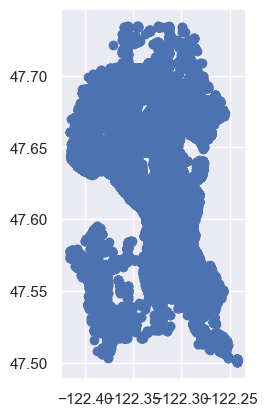

In [44]:
curb.plot()

In [58]:
curb_west = curb[(labels['geometry'].x < -122.35) & (labels['geometry'].y < 47.6)]

<AxesSubplot: >

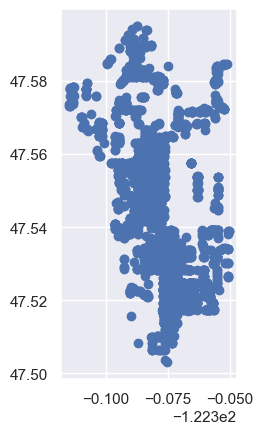

In [59]:
curb_west.plot()

In [75]:
curb_north = curb[(labels['geometry'].y > 47.71)]

<AxesSubplot: >

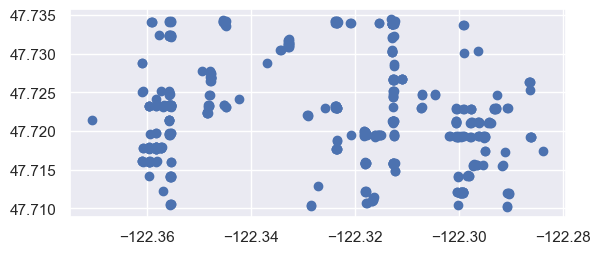

In [76]:
curb_north.plot()

In [77]:
curb_p = pd.concat([curb_north,curb_west])

In [82]:
id_list= curb_p['label_id'].unique().tolist()
curb_m = curb[~curb['label_id'].isin(id_list)]

In [84]:
curb_main = curb_m.to_crs("EPSG:2285")

In [90]:
curb_tp = curb_main.sjoin(r1, op="within", how="inner")

In [91]:
id_list= curb_tp['label_id'].unique().tolist()
curb_fp = curb_main[~curb_main['label_id'].isin(id_list)]

In [94]:
# save the data as a geojson file
curb_fp.to_file('data/curb_fp.geojson', driver='GeoJSON')

In [2]:
# read the geojson file
curb_fp = gpd.read_file('data/curb_fp.geojson')

In [5]:
# save curb_fp as a csv file, index=False to avoid saving the index
curb_fp.to_csv('data/curb_fp.csv', index=False)